<a href="https://colab.research.google.com/github/Dmytro542/Python_projects/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing work folder
%cd /content/drive/MyDrive/Documents/study/Mate/Jupyter_Notebook/final_project

/content/drive/MyDrive/Documents/study/Mate/Jupyter_Notebook/final_project


In [ ]:
# Import CSV file

events_data = pd.read_csv("events.csv")
events_data.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
# Import CSV file

countries_data = pd.read_csv("countries.csv")
countries_data.head()


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# Import CSV file

products_data = pd.read_csv("products.csv")
products_data.head()


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
# Display DataFrames shape

print(f"events_data shape: {events_data.shape}")
print(f"countries_data shape: {countries_data.shape}")
print(f"products_data shape: {products_data.shape}")


events_data shape: (1330, 10)
countries_data shape: (249, 5)
products_data shape: (12, 2)


In [ ]:
# Display DataFrames info

print("events_data info:")
events_data.info()

print("\ncountries_data info:")
countries_data.info()

print("\nproducts_data info:")
products_data.info()


events_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB

countries_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-

##Dataset Descriptions:
###events_data:  
Order ID – Unique identifier for an order  
Order Date – Date when the order was placed  
Ship Date – Date when the order was shipped  
Order Priority – Priority level of the order  
Country Code – Three-letter country code (alpha-3)  
Product ID – Unique identifier for the product
Sales Channel – Sales channel used for the transaction  
Units Sold – Number of product units sold  
Unit Price – Price per unit of the product  
Unit Cost – Cost per unit of the product  

###countries_data:
name – Country name  
alpha-2 – Two-letter country code  
alpha-3 – Three-letter country code  
region – Geographical region of the country  
sub-region – Sub-region of the country  
###products_data:
id – Product identifier (Product ID)  
item_type – Type of product
###Key Fields:
events_data 'Country Code' = countries_data 'alpha-3'  
events_data 'Product ID' = products_data 'id'








In [ ]:
# Convert into datetime

events_data['Order Date'] = pd.to_datetime(events_data['Order Date'], errors='coerce')
events_data['Ship Date'] = pd.to_datetime(events_data['Ship Date'], errors='coerce')


In [ ]:
# Missing Values check

print("Missing Values events_data:")
print(events_data.isna().sum())

print("\nMissing Values countries_data:")
print(countries_data.isna().sum())

print("\nMissing Values products_data:")
print(products_data.isna().sum())


Missing Values events_data:
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

Missing Values countries_data:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

Missing Values products_data:
id           0
item_type    0
dtype: int64


In [ ]:
# Missing Values percentage

print("Missing Values percentage events_data:")
print((events_data.isna().sum() / events_data.shape[0]) * 100)

print("\nMissing Values percentage countries_data:")
print((countries_data.isna().sum() / countries_data.shape[0]) * 100)

print("\nMissing Values percentage products_data:")
print((products_data.isna().sum() / products_data.shape[0]) * 100)


Missing Values percentage events_data:
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64

Missing Values percentage countries_data:
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64

Missing Values percentage products_data:
id           0.0
item_type    0.0
dtype: float64


In [ ]:
# Missing Value rows display

missing_data_rows = countries_data[countries_data.isna().any(axis=1)]
print(missing_data_rows)


           name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa


In [ ]:
# Missing Value rows display

missing_data_rows_events = events_data[events_data.isna().any(axis=1)]
print(missing_data_rows_events)


       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
2     101025998 2014-07-18 2014-08-11              M          NaN        7940   
13    104548490 2014-01-01 2014-01-05              M          NaN        7331   
26    117929494 2015-01-24 2015-03-02              H          NaN        4594   
29    118859469 2011-06-02 2011-07-01              L          NaN        8969   
43    126948583 2017-05-24 2017-07-09              C          NaN        7331   
...         ...        ...        ...            ...          ...         ...   
1213  919922006 2011-08-27 2011-09-18              L          NaN        4594   
1220  922564303 2017-03-17 2017-04-02              L          NaN        7940   
1250  941061675 2017-03-08 2017-03-20              M          NaN        5988   
1296  975080668 2017-07-23 2017-08-20              C          NaN        5988   
1317  989102828 2012-06-11 2012-07-08              L          NaN        4594   

     Sales Channel  Units S

###countries_data:

 - Row 8: Antarctica is not part of any specific region or sub-region; the absence of data is not an error.
 - Row 153: The alpha-2 country code for Namibia is missing and will be filled according to ISO 3166-1.
###events_data:

 - The Country Code is missing in 82 rows. These rows will not be removed to avoid significant data loss. Missing values will not be filled, as during grouping, the data will appear as a separate group with no assigned country.
 - Two rows with missing Units Sold will be deleted. There is no available data to fill these rows, and rows with empty Units Sold are meaningless and cause data inconsistencies.

In [ ]:
# Replacing NaN with "NA"

countries_data.loc[153, 'alpha-2'] = 'NA'
print("Updated row at index 153:")
print(countries_data.loc[153])

Updated row at index 153:
name                     Namibia
alpha-2                       NA
alpha-3                      NAM
region                    Africa
sub-region    Sub-Saharan Africa
Name: 153, dtype: object


In [ ]:
# Removing Missing Values rows from original DataFrame

events_data.dropna(subset=['Units Sold'], inplace=True)

print(events_data.isna().sum())


Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         0
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
# Data cleaning

def clean_data(df):
    for col in df.select_dtypes(include=['object']).columns:
        # removing extra spaces
        df[col] = df[col].str.strip()
        # converting to lowercase
        df[col] = df[col].str.lower()
    return df

# Applying data cleaning to DataFrames
clean_data(events_data)
clean_data(countries_data)
clean_data(products_data)

# Duplicate check
def check_duplicates(df, df_name):
    duplicate_rows = df.duplicated()
    print(f"\n{df_name} duplicate:")
    print(duplicate_rows.sum())
    if duplicate_rows.sum() > 0:
        print(df[duplicate_rows])

# Applying duplicate check to DataFrames
check_duplicates(events_data, "events_data")
check_duplicates(countries_data, "countries_data")
check_duplicates(products_data, "products_data")




events_data duplicate:
0

countries_data duplicate:
0

products_data duplicate:
0


In [ ]:
# Anomaly check

def check_anomalies(df, df_name):
    print(f"\n{df_name} anomaly:")

    if 'units_sold' in df.columns:
        anomalous_units_sold = df[df['units_sold'] < 0]
        print(f"\nAnomaly units_sold:\n{anomalous_units_sold}")

    if 'unit_price' in df.columns:
        anomalous_unit_price = df[df['unit_price'] < 0]
        print(f"\nAnomaly unit_price:\n{anomalous_unit_price}")

    if 'unit_cost' in df.columns:
        anomalous_unit_cost = df[df['unit_cost'] < 0]
        print(f"\nAnomaly unit_cost:\n{anomalous_unit_cost}")

    if 'alpha-2' in df.columns:
        anomalous_alpha2 = df[df['alpha-2'].isna()]
        print(f"\nAnomaly alpha-2:\n{anomalous_alpha2}")

check_anomalies(events_data, "events_data")
check_anomalies(countries_data, "countries_data")
check_anomalies(products_data, "products_data")



events_data anomaly:

countries_data anomaly:

Anomaly alpha-2:
Empty DataFrame
Columns: [name, alpha-2, alpha-3, region, sub-region]
Index: []

products_data anomaly:


In [ ]:
# DataFrames merge
merged_data = events_data.merge(countries_data, left_on="Country Code", right_on="alpha-3", how="left")
merged_data = merged_data.merge(products_data, left_on="Product ID", right_on="id", how="left")

# Delete colums
merged_data = merged_data.drop(columns=["Country Code", "alpha-2", "alpha-3", "sub-region", "id", "Product ID"])

# Rename colums
merged_data = merged_data.rename(columns={
    "Order ID": "order_id",
    "Order Date": "order_date",
    "Ship Date": "ship_date",
    "Order Priority": "order_priority",
    "name": "country",
    "Sales Channel": "sales_channel",
    "Units Sold": "units_sold",
    "Unit Price": "unit_price",
    "Unit Cost": "unit_cost",
    "item_type": "product_type"
})

# Order colums
column_order = [
    "order_id", "order_date", "ship_date", "order_priority",
    "country", "product_type", "sales_channel",
    "units_sold", "unit_price", "unit_cost", "region"
]
merged_data = merged_data[column_order]

print(merged_data.info())
print(merged_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   country         1246 non-null   object        
 5   product_type    1328 non-null   object        
 6   sales_channel   1328 non-null   object        
 7   units_sold      1328 non-null   float64       
 8   unit_price      1328 non-null   float64       
 9   unit_cost       1328 non-null   float64       
 10  region          1246 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 114.3+ KB
None
    order_id order_date  ship_date order_priority     country product_type  \
0  100640618 2014-10-08 2014-10-18              m  

In [ ]:
# Metrics сalculation

total_orders = merged_data["order_id"].nunique()  # Number of unique orders
merged_data["total_revenue"] = merged_data["units_sold"] * merged_data["unit_price"]  # Revenue calculation
merged_data["total_cost"] = merged_data["units_sold"] * merged_data["unit_cost"]  # Cost calculation
merged_data["total_profit"] = merged_data["total_revenue"] - merged_data["total_cost"]  # Profit calculation

# Total profit
total_profit = merged_data["total_profit"].sum()

# Total number of countries
total_countries = merged_data["country"].nunique()

# Top sales channel
top_sales_channel = merged_data["sales_channel"].value_counts().idxmax()

# Top product type
top_product_type = merged_data["product_type"].value_counts().idxmax()

# Average selling price
average_price = merged_data["unit_price"].mean()

# Total number of units sold
total_units_sold = merged_data["units_sold"].sum()


print(f"📊 Key Company Metrics:")
print(f"🔹 Total Number of Orders: {total_orders}")
print(f"💰 Total Profit: {total_profit:,.2f}")
print(f"🌍 Countries Covered: {total_countries}")
print(f"📢 Top Sales Channel: {top_sales_channel}")
print(f"📦 Top Product Type: {top_product_type}")
print(f"💲 Average Selling Price: {average_price:.2f}")
print(f"📈 Total Units Sold: {total_units_sold:,.0f}")



📊 Key Company Metrics:
🔹 Total Number of Orders: 1328
💰 Total Profit: 501,434,459.00
🌍 Countries Covered: 45
📢 Top Sales Channel: offline
📦 Top Product Type: office supplies
💲 Average Selling Price: 264.91
📈 Total Units Sold: 6,576,524


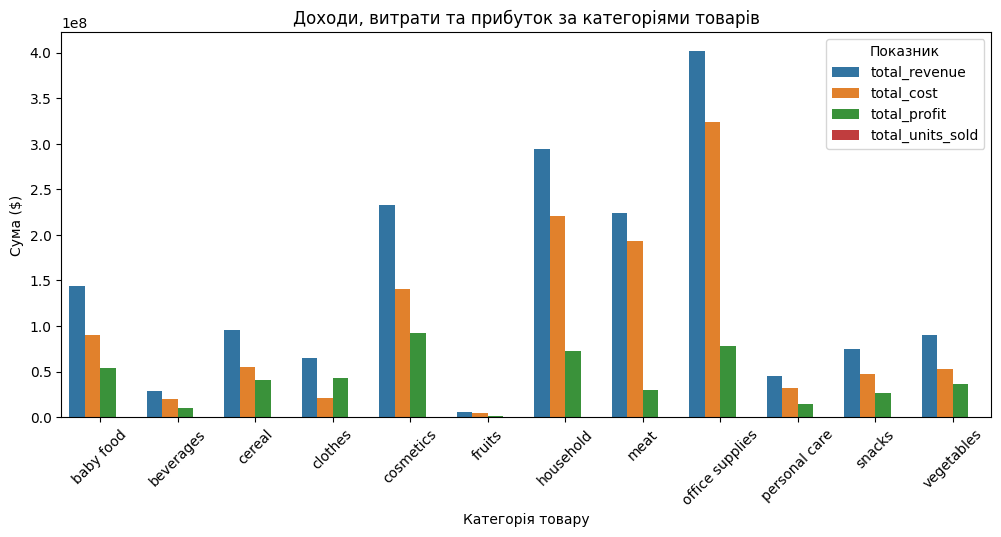

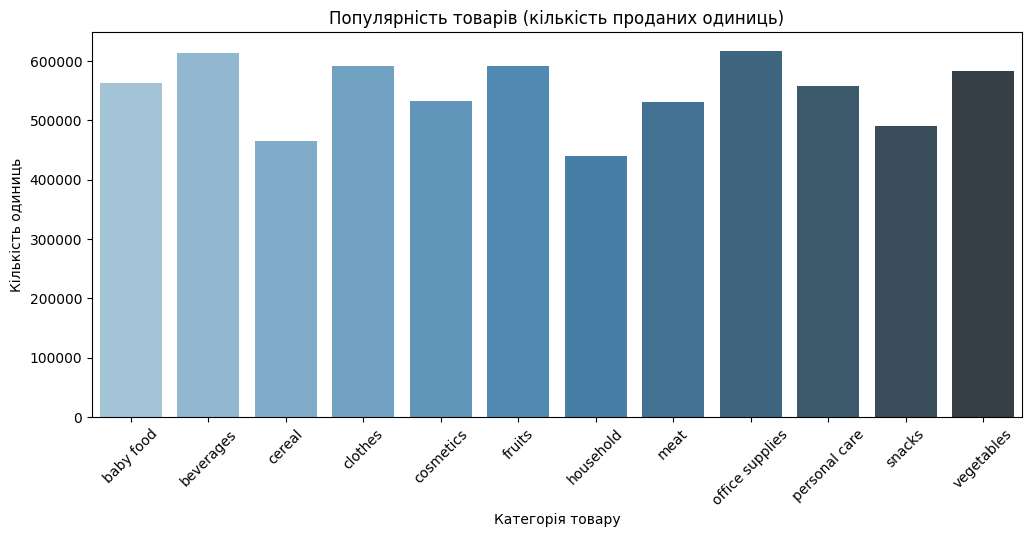

       product_type  units_sold
8   office supplies    617641.0
1         beverages    613133.0
5            fruits    591672.0
3           clothes    591385.0
11       vegetables    582544.0
0         baby food    562706.0
9     personal care    557678.0
4         cosmetics    533291.0
7              meat    530380.0
10           snacks    490160.0
2            cereal    465685.0
6         household    440249.0


In [ ]:
# Групуємо дані за категоріями товарів
category_sales = merged_data.groupby("product_type").agg(
    total_revenue=("total_revenue", "sum"),
    total_cost=("total_cost", "sum"),
    total_profit=("total_profit", "sum"),
    total_units_sold=("units_sold", "sum")
).reset_index()

# Візуалізація доходу, витрат і прибутку за категоріями товарів
plt.figure(figsize=(12, 5))
sns.barplot(data=category_sales.melt(id_vars="product_type"), x="product_type", y="value", hue="variable")
plt.xticks(rotation=45)
plt.title("Доходи, витрати та прибуток за категоріями товарів")
plt.ylabel("Сума ($)")
plt.xlabel("Категорія товару")
plt.legend(title="Показник")
plt.show()

# Групуємо дані за категоріями товарів та сумуємо кількість проданих одиниць
category_sales = merged_data.groupby('product_type')['units_sold'].sum().reset_index()

# Візуалізація популярності товарів
plt.figure(figsize=(12, 5))
sns.barplot(
    data=category_sales,
    x="product_type",
    y="units_sold",  # Використовуємо 'units_sold' для підрахунку кількості проданих одиниць
    hue="product_type",  # Додаємо hue, щоб використовувати palette
    palette="Blues_d",
    legend=False  # Прибираємо зайву легенду
)
plt.xticks(rotation=45)
plt.title("Популярність товарів (кількість проданих одиниць)")
plt.ylabel("Кількість одиниць")
plt.xlabel("Категорія товару")
plt.show()

# Сортуємо за кількістю одиниць у низхідному порядку
category_sales_sorted = category_sales.sort_values(by='units_sold', ascending=False)

# Виводимо результат
print(category_sales_sorted)


 - 'office supplies' 'household' 'cosmetics' - топ 3 категоріі у порядку спадання за показниками доходу, витрат та прибутку. Графік показує, що вони значно переважають інші категорії

 - категорії товару, що була б значно популярнішою за інші немає: 'office supplies','beverages', 'fruits' - топ 3 категоріі у порядку спадання за популярністю

In [ ]:
# Grouping data by product categories
category_sales = merged_data.groupby("product_type").agg(
    total_revenue=("total_revenue", "sum"),
    total_cost=("total_cost", "sum"),
    total_profit=("total_profit", "sum"),
    total_units_sold=("units_sold", "sum")
).reset_index()

# Visualization of revenue, costs, and profit by product categories
plt.figure(figsize=(12, 5))
sns.barplot(data=category_sales.melt(id_vars="product_type"), x="product_type", y="value", hue="variable")
plt.xticks(rotation=45)
plt.title("Revenue, Costs, and Profit by Product Categories")
plt.ylabel("Amount ($)")
plt.xlabel("Product Category")
plt.legend(title="Metric")
plt.show()

# Grouping data by product categories and summing up the number of units sold
category_sales = merged_data.groupby('product_type')['units_sold'].sum().reset_index()

# Visualization of product popularity
plt.figure(figsize=(12, 5))
sns.barplot(
    data=category_sales,
    x="product_type",
    y="units_sold",  # Using 'units_sold' to count the number of sold units
    hue="product_type",  # Adding hue to use a palette
    palette="Blues_d",
    legend=False  # Removing unnecessary legend
)
plt.xticks(rotation=45)
plt.title("Product Popularity (Number of Units Sold)")
plt.ylabel("Number of Units")
plt.xlabel("Product Category")
plt.show()

# Sorting by the number of units sold in descending order
category_sales_sorted = category_sales.sort_values(by='units_sold', ascending=False)

# Displaying the result
print(category_sales_sorted)


 - 'Office Supplies', 'Household', and 'Cosmetics' are the top 3 categories in descending order based on revenue, costs, and profit. The chart shows that they significantly outperform other categories.

 - There is no single product category that is significantly more popular than others: 'Office Supplies', 'Beverages', and 'Fruits' are the top 3 categories in descending order of popularity.

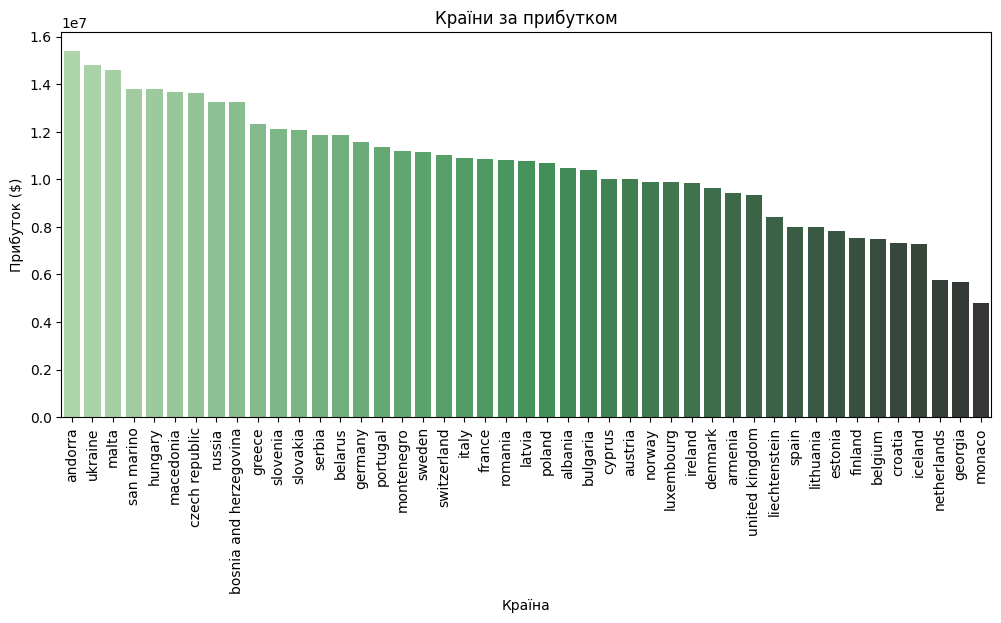

,country,total_profit
1,andorra,15410036.63
43,ukraine,14804925.74
27,malta,14610127.88
36,san marino,13792992.81
18,hungary,13786231.03
26,macedonia,13684099.95
10,czech republic,13635593.78
35,russia,13267682.64
6,bosnia and herzegovina,13257602.77
17,greece,12324450.13


In [ ]:
# Групуємо дані за країнами та обчислюємо загальний прибуток
country_profit = merged_data.groupby("country")["total_profit"].sum().reset_index()

# Сортуємо за прибутком у спадаючому порядку
country_profit = country_profit.sort_values(by="total_profit", ascending=False)

# Візуалізація прибутку за країнами
plt.figure(figsize=(12, 5))
sns.barplot(data=country_profit, x="country", y="total_profit", hue="country", dodge=False, palette="Greens_d", legend=False)
plt.xticks(rotation=90)  # Робимо назви країн вертикальними
plt.title("Країни за прибутком")
plt.ylabel("Прибуток ($)")
plt.xlabel("Країна")
plt.show()

# Виводимо таблицю з даними
country_profit.head(10)


 - Прибуток по країнам спадає плавно топ 3 країни за прибутком у порядку спадання andorra ukraine malta

In [ ]:
# Grouping data by countries and calculating total profit
country_profit = merged_data.groupby("country")["total_profit"].sum().reset_index()

# Sorting by profit in descending order
country_profit = country_profit.sort_values(by="total_profit", ascending=False)

# Visualizing profit by country
plt.figure(figsize=(12, 5))
sns.barplot(data=country_profit, x="country", y="total_profit", hue="country", dodge=False, palette="Greens_d", legend=False)
plt.xticks(rotation=90)  # Rotating country labels vertically
plt.title("Countries by Profit")
plt.ylabel("Profit ($)")
plt.xlabel("Country")
plt.show()

# Displaying the top 10 countries by profit
country_profit.head(10)


 - The profit by country decreases gradually. The top 3 countries by profit in descending order are Andorra, Ukraine, and Malta.

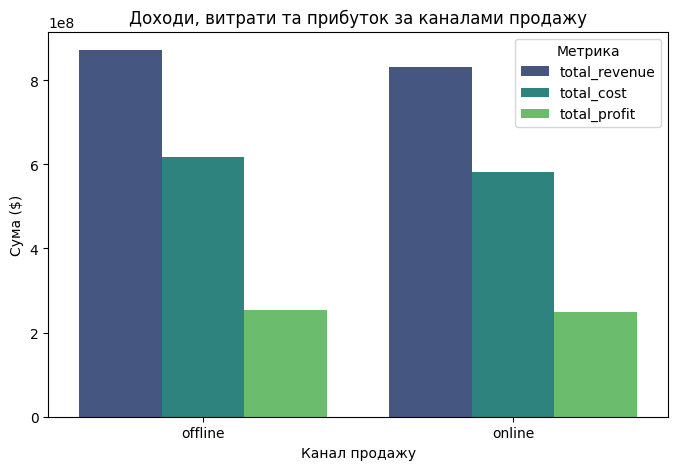

  sales_channel         metric         value
0       offline  total_revenue  8.717606e+08
1        online  total_revenue  8.303688e+08
2       offline     total_cost  6.182941e+08
3        online     total_cost  5.824008e+08
4       offline   total_profit  2.534665e+08
5        online   total_profit  2.479679e+08


In [ ]:
# Групуємо дані за каналами продажу
channel_sales = merged_data.groupby("sales_channel").agg(
    total_revenue=("total_revenue", "sum"),
    total_cost=("total_cost", "sum"),
    total_profit=("total_profit", "sum"),
    total_units_sold=("units_sold", "sum")
).reset_index()

# Перетворюємо дані в довгий формат, щоб підготувати для візуалізації
channel_sales_melted = channel_sales.melt(id_vars="sales_channel", value_vars=["total_revenue", "total_cost", "total_profit"], var_name="metric", value_name="value")

# Візуалізація
plt.figure(figsize=(8, 5))
sns.barplot(data=channel_sales_melted, x="sales_channel", y="value", hue="metric", palette="viridis")
plt.title("Доходи, витрати та прибуток за каналами продажу")
plt.ylabel("Сума ($)")
plt.xlabel("Канал продажу")
plt.legend(title="Метрика")
plt.show()

# Виведення таблиці з агрегованими даними за каналами продажу
print(channel_sales_melted)


 - Значної різниці між доходами, витратами та прибутком каналів продажу offline online немає

In [ ]:
# Grouping data by sales channels
channel_sales = merged_data.groupby("sales_channel").agg(
    total_revenue=("total_revenue", "sum"),
    total_cost=("total_cost", "sum"),
    total_profit=("total_profit", "sum"),
    total_units_sold=("units_sold", "sum")
).reset_index()

# Transforming data into long format for visualization
channel_sales_melted = channel_sales.melt(id_vars="sales_channel", value_vars=["total_revenue", "total_cost", "total_profit"], var_name="metric", value_name="value")

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=channel_sales_melted, x="sales_channel", y="value", hue="metric", palette="viridis")
plt.title("Revenue, Costs, and Profit by Sales Channels")
plt.ylabel("Amount ($)")
plt.xlabel("Sales Channel")
plt.legend(title="Metric")
plt.show()

# Displaying the aggregated data table by sales channels
print(channel_sales_melted)


 - There is no significant difference in revenue, costs, and profit between the offline and online sales channels.

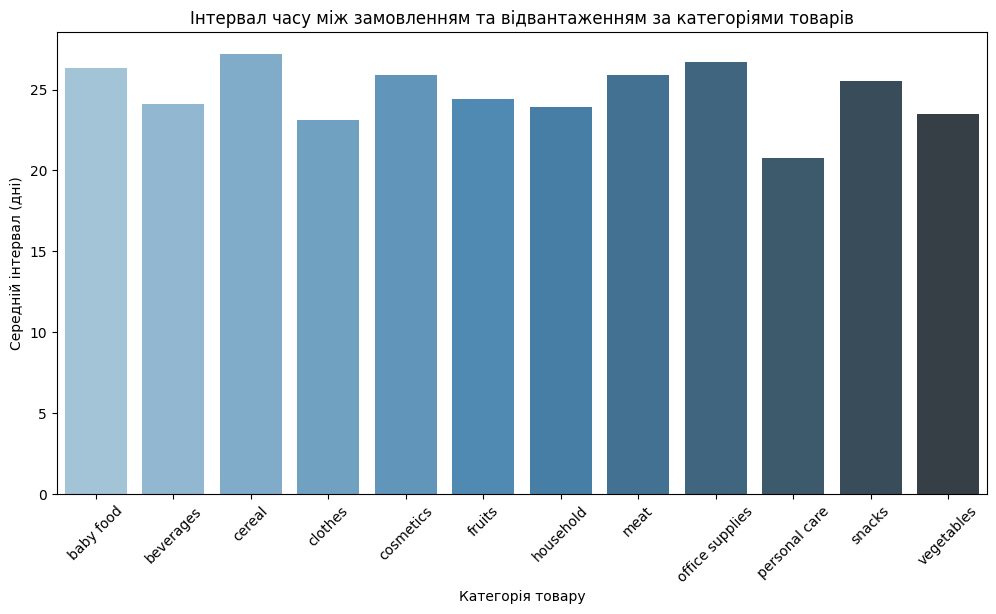

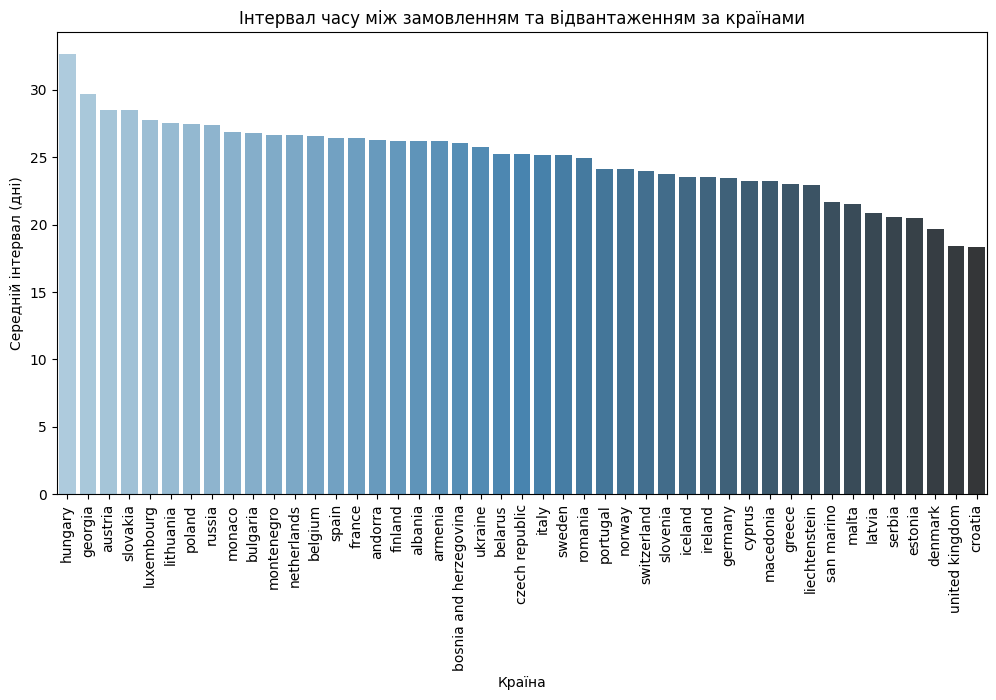

                   country  shipping_delay
18                 hungary       32.640000
15                 georgia       29.695652
3                  austria       28.500000
38                slovakia       28.466667
25              luxembourg       27.750000
24               lithuania       27.560000
32                  poland       27.464286
35                  russia       27.375000
28                  monaco       26.846154
7                 bulgaria       26.800000
29              montenegro       26.678571
30             netherlands       26.625000
5                  belgium       26.538462
40                   spain       26.440000
14                  france       26.423077
1                  andorra       26.275000
13                 finland       26.217391
0                  albania       26.190476
2                  armenia       26.172414
6   bosnia and herzegovina       26.060606
43                 ukraine       25.757576
4                  belarus       25.250000
10         

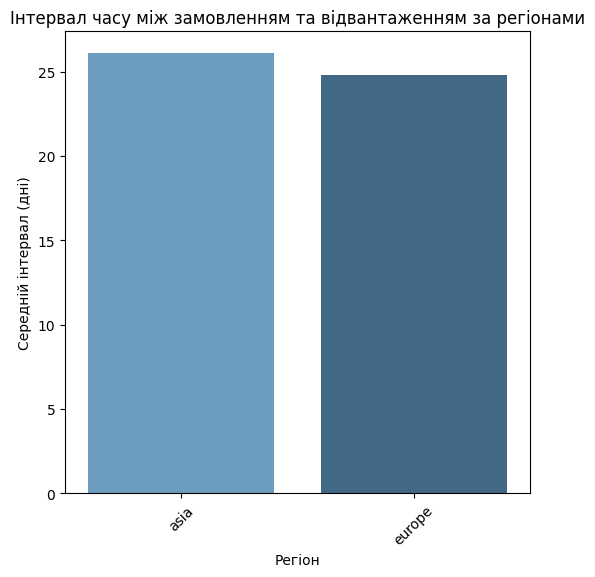

In [ ]:
# Обчислюємо інтервал часу між замовленням та відвантаженням
merged_data['shipping_delay'] = (merged_data['ship_date'] - merged_data['order_date']).dt.days

# Групуємо за категоріями товарів
category_shipping_delay = merged_data.groupby('product_type')['shipping_delay'].mean().reset_index()

# Візуалізація інтервалу часу за категоріями товарів
plt.figure(figsize=(12, 6))
sns.barplot(data=category_shipping_delay, x='product_type', y='shipping_delay', hue='product_type', palette="Blues_d", legend=False)
plt.xticks(rotation=45)
plt.title("Інтервал часу між замовленням та відвантаженням за категоріями товарів")
plt.ylabel("Середній інтервал (дні)")
plt.xlabel("Категорія товару")
plt.show()

# Групуємо за країнами
country_shipping_delay = merged_data.groupby('country')['shipping_delay'].mean().reset_index()

# Сортуємо дані за інтервалом часу у спадаючому порядку
country_shipping_delay = country_shipping_delay.sort_values(by="shipping_delay", ascending=False)

# Візуалізація інтервалу часу за країнами
plt.figure(figsize=(12, 6))
sns.barplot(data=country_shipping_delay, x='country', y='shipping_delay', hue='country', palette="Blues_d", legend=False)

plt.xticks(rotation=90)
plt.title("Інтервал часу між замовленням та відвантаженням за країнами")
plt.ylabel("Середній інтервал (дні)")
plt.xlabel("Країна")

plt.show()

# Виведення таблиці з інтервалом часу за країнами
print(country_shipping_delay)

# Групуємо за регіонами (якщо є відповідний стовпець, наприклад, 'region')
region_shipping_delay = merged_data.groupby('region')['shipping_delay'].mean().reset_index()

# Візуалізація інтервалу часу за регіонами
plt.figure(figsize=(6, 6))
sns.barplot(data=region_shipping_delay, x='region', y='shipping_delay', hue='region', palette="Blues_d", legend=False)
plt.xticks(rotation=45)
plt.title("Інтервал часу між замовленням та відвантаженням за регіонами")
plt.ylabel("Середній інтервал (дні)")
plt.xlabel("Регіон")
plt.show()


 - Значних відхилень в інтервалі часу між замовленням та його відвантаженням в розрізі категорії продуктів та регіонів не виявлено.

 - інтервалі часу між замовленням та його відвантаженням в розрізі країн плавно спадає з кроком в 1-2 дні.


In [ ]:
# Calculate the time interval between order and shipment
merged_data['shipping_delay'] = (merged_data['ship_date'] - merged_data['order_date']).dt.days

# Group by product categories
category_shipping_delay = merged_data.groupby('product_type')['shipping_delay'].mean().reset_index()

# Visualization of the time interval by product categories
plt.figure(figsize=(12, 6))
sns.barplot(data=category_shipping_delay, x='product_type', y='shipping_delay', hue='product_type', palette="Blues_d", legend=False)
plt.xticks(rotation=45)
plt.title("Time Interval Between Order and Shipment by Product Category")
plt.ylabel("Average Interval (days)")
plt.xlabel("Product Category")
plt.show()

# Group by countries
country_shipping_delay = merged_data.groupby('country')['shipping_delay'].mean().reset_index()

# Sort data by time interval in descending order
country_shipping_delay = country_shipping_delay.sort_values(by="shipping_delay", ascending=False)

# Visualization of the time interval by countries
plt.figure(figsize=(12, 6))
sns.barplot(data=country_shipping_delay, x='country', y='shipping_delay', hue='country', palette="Blues_d", legend=False)

plt.xticks(rotation=90)
plt.title("Time Interval Between Order and Shipment by Country")
plt.ylabel("Average Interval (days)")
plt.xlabel("Country")

plt.show()

# Display table with time interval by country
print(country_shipping_delay)

# Group by regions (if there is a corresponding column, e.g., 'region')
region_shipping_delay = merged_data.groupby('region')['shipping_delay'].mean().reset_index()

# Visualization of the time interval by regions
plt.figure(figsize=(6, 6))
sns.barplot(data=region_shipping_delay, x='region', y='shipping_delay', hue='region', palette="Blues_d", legend=False)
plt.xticks(rotation=45)
plt.title("Time Interval Between Order and Shipment by Region")
plt.ylabel("Average Interval (days)")
plt.xlabel("Region")
plt.show()


 - No significant deviations in the time interval between order and shipment were found across product categories and regions.

 - The time interval between order and shipment across countries gradually decreases in steps of 1-2 days.

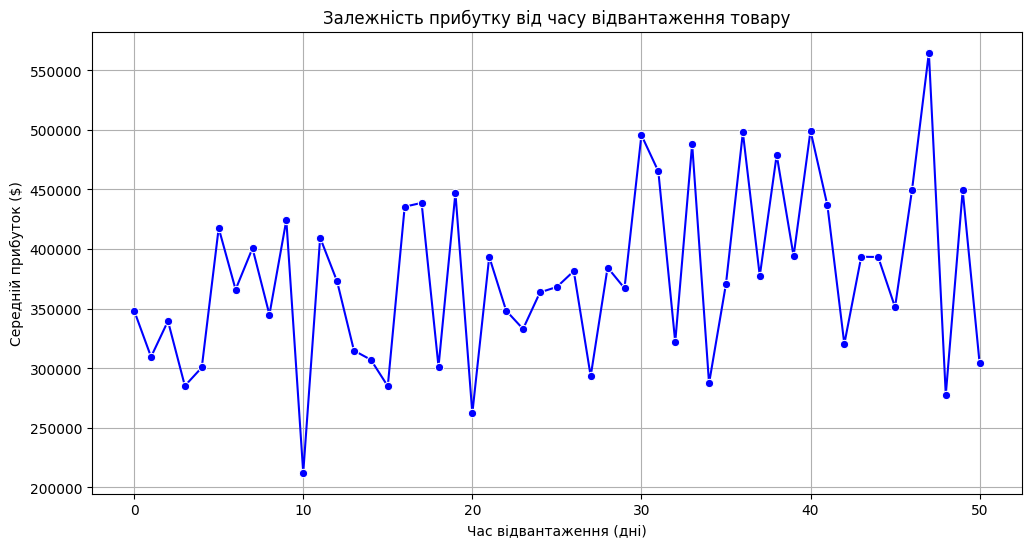

Кореляція між прибутком і часом відвантаження:
                shipping_delay    profit
shipping_delay        1.000000  0.060299
profit                0.060299  1.000000


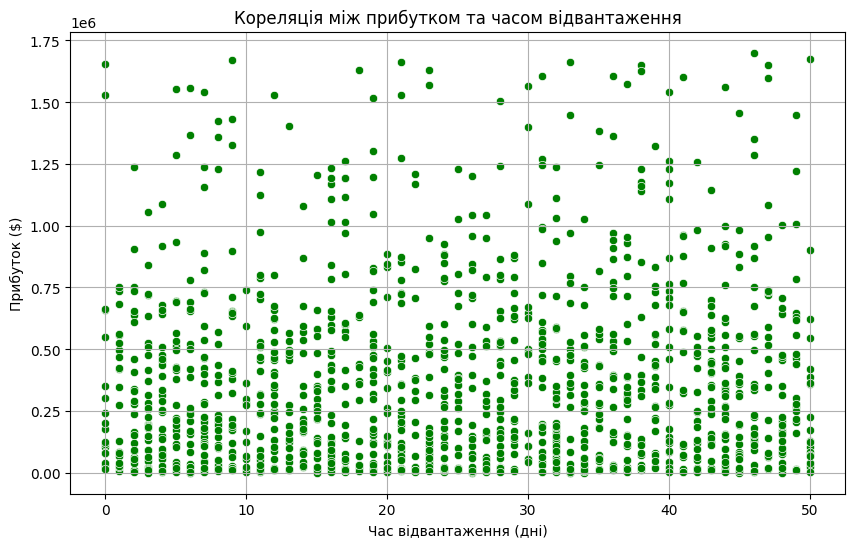

In [ ]:
# Додаємо нову колонку для прибутку
merged_data['profit'] = (merged_data['unit_price'] - merged_data['unit_cost']) * merged_data['units_sold']

# Групуємо за інтервалом часу (shipping_delay) та обчислюємо середній прибуток
shipping_delay_profit = merged_data.groupby('shipping_delay')['profit'].mean().reset_index()

# Візуалізація залежності прибутку від інтервалу часу
plt.figure(figsize=(12, 6))
sns.lineplot(data=shipping_delay_profit, x='shipping_delay', y='profit', marker='o', color='b')
plt.title("Залежність прибутку від часу відвантаження товару")
plt.xlabel("Час відвантаження (дні)")
plt.ylabel("Середній прибуток ($)")
plt.grid(True)
plt.show()

# Кореляція між прибутком і часом відвантаження
correlation = merged_data[['shipping_delay', 'profit']].corr()
print(f"Кореляція між прибутком і часом відвантаження:\n{correlation}")

# Візуалізація кореляції між прибутком і часом відвантаження
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='shipping_delay', y='profit', color='green')
plt.title("Кореляція між прибутком та часом відвантаження")
plt.xlabel("Час відвантаження (дні)")
plt.ylabel("Прибуток ($)")
plt.grid(True)
plt.show()


 - Слід виділити значне зниження прибутку при затримці у 10 та 20 днів. Також є значне зростання прибутку при затримці 45-47 днів

In [ ]:
# Add a new column for profit
merged_data['profit'] = (merged_data['unit_price'] - merged_data['unit_cost']) * merged_data['units_sold']

# Group by shipping delay and calculate the average profit
shipping_delay_profit = merged_data.groupby('shipping_delay')['profit'].mean().reset_index()

# Visualization of profit dependence on shipping delay
plt.figure(figsize=(12, 6))
sns.lineplot(data=shipping_delay_profit, x='shipping_delay', y='profit', marker='o', color='b')
plt.title("Profit Dependency on Shipping Delay")
plt.xlabel("Shipping Delay (days)")
plt.ylabel("Average Profit ($)")
plt.grid(True)
plt.show()

# Correlation between profit and shipping delay
correlation = merged_data[['shipping_delay', 'profit']].corr()
print(f"Correlation between profit and shipping delay:\n{correlation}")

# Visualization of correlation between profit and shipping delay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='shipping_delay', y='profit', color='green')
plt.title("Correlation between Profit and Shipping Delay")
plt.xlabel("Shipping Delay (days)")
plt.ylabel("Profit ($)")
plt.grid(True)
plt.show()


 - A significant drop in profit should be highlighted at delays of 10 and 20 days. Additionally, there is a notable increase in profit at delays of 45–47 days.

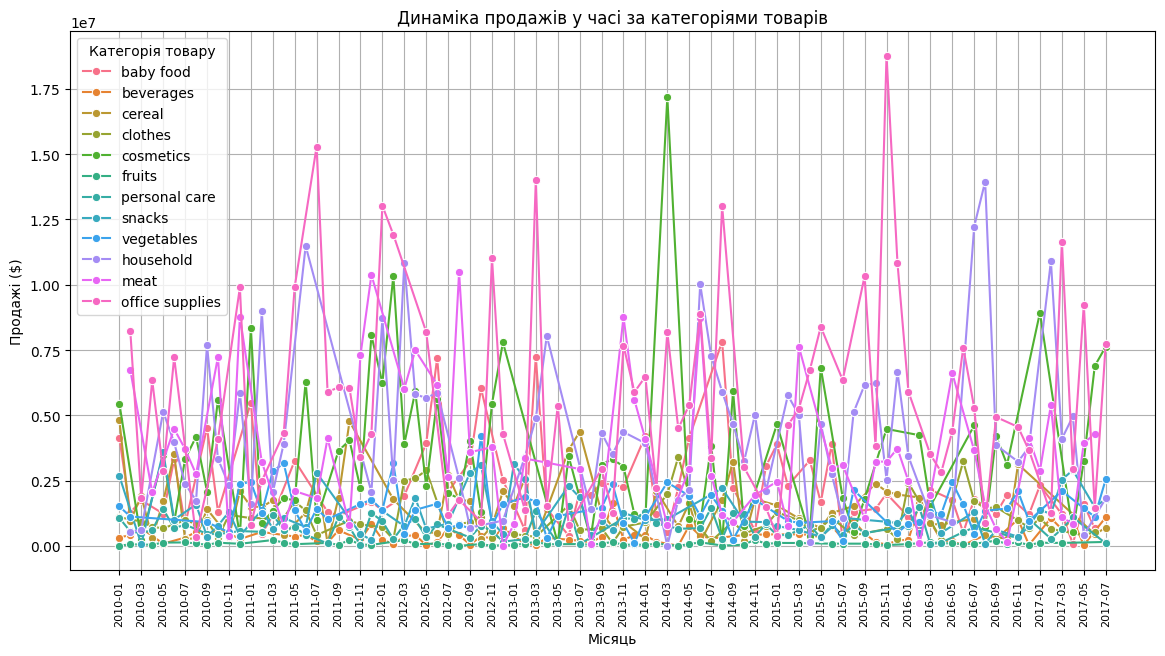

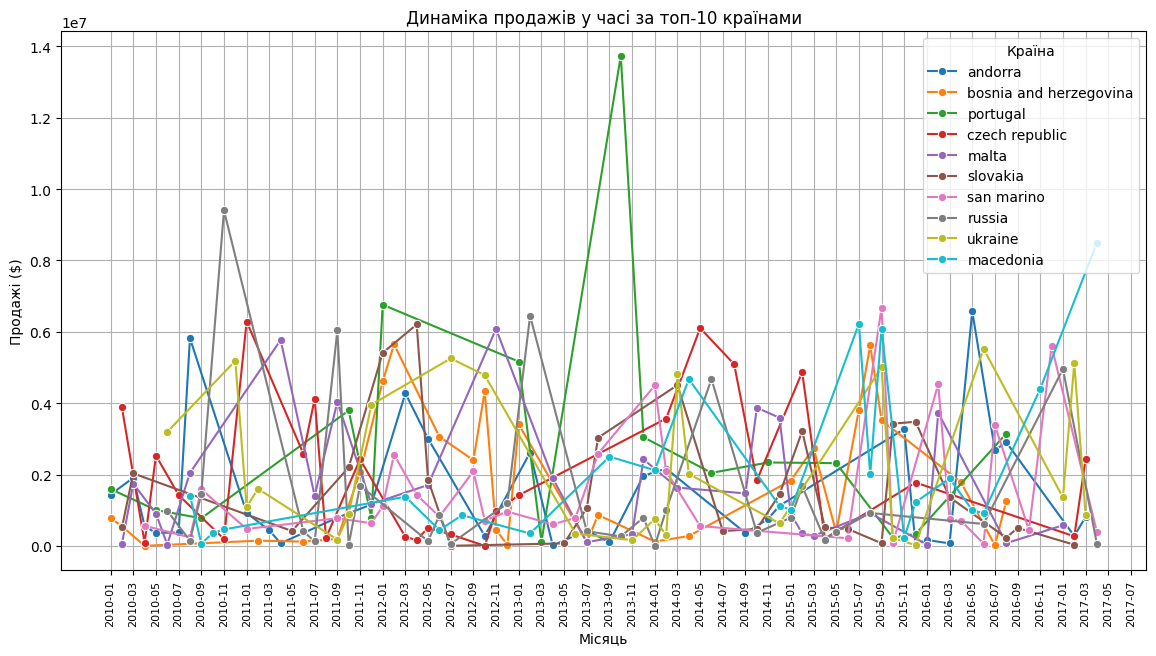

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Перетворюємо дату у формат YYYY-MM для коректного групування
merged_data['year_month'] = merged_data['order_date'].dt.strftime('%Y-%m')

# Групуємо за категоріями товарів
category_sales = merged_data.groupby(['year_month', 'product_type'])['total_revenue'].sum().reset_index()

# Візуалізація динаміки продажів за категоріями товарів
plt.figure(figsize=(14, 7))
sns.lineplot(data=category_sales, x='year_month', y='total_revenue', hue='product_type', marker='o')

plt.title("Динаміка продажів у часі за категоріями товарів")
plt.xlabel("Місяць")
plt.ylabel("Продажі ($)")

# Зменшення шрифту та виведення підписів осі X через один
plt.xticks(rotation=90, fontsize=8)  # Зменшено шрифт
plt.xticks(ticks=range(0, len(category_sales['year_month'].unique()), 2), labels=category_sales['year_month'].unique()[::2])

plt.legend(title="Категорія товару")
plt.grid(True)
plt.show()

# Визначаємо топ-10 країн за загальним доходом
top_10_countries = merged_data.groupby("country")["total_revenue"].sum().nlargest(10).index

# Фільтруємо дані лише для цих країн
top_country_sales = merged_data[merged_data["country"].isin(top_10_countries)]
country_sales = merged_data.groupby(['year_month', 'country'])['total_revenue'].sum().reset_index()

# Візуалізація динаміки продажів за топ-10 країнами
plt.figure(figsize=(14, 7))
sns.lineplot(data=country_sales[country_sales["country"].isin(top_10_countries)],
             x='year_month', y='total_revenue', hue='country', marker='o')

plt.title("Динаміка продажів у часі за топ-10 країнами")
plt.xlabel("Місяць")
plt.ylabel("Продажі ($)")

# Зменшення шрифту та виведення підписів осі X через один
plt.xticks(rotation=90, fontsize=8)
plt.xticks(ticks=range(0, len(country_sales['year_month'].unique()), 2), labels=country_sales['year_month'].unique()[::2])

plt.legend(title="Країна")
plt.grid(True)
plt.show()


 - Спостерігаються зростання продажів у категорії office supplies 05.2011 03.2013 11.2015(max)
cosmetics 03.2014

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the date to YYYY-MM format for proper grouping
merged_data['year_month'] = merged_data['order_date'].dt.strftime('%Y-%m')

# Group by product categories
category_sales = merged_data.groupby(['year_month', 'product_type'])['total_revenue'].sum().reset_index()

# Visualizing sales trends over time by product category
plt.figure(figsize=(14, 7))
sns.lineplot(data=category_sales, x='year_month', y='total_revenue', hue='product_type', marker='o')

plt.title("Sales Trend Over Time by Product Category")
plt.xlabel("Month")
plt.ylabel("Sales ($)")

# Reduce font size and display every other X-axis label
plt.xticks(rotation=90, fontsize=8)
plt.xticks(ticks=range(0, len(category_sales['year_month'].unique()), 2),
           labels=category_sales['year_month'].unique()[::2])

plt.legend(title="Product Category")
plt.grid(True)
plt.show()

# Determine the top 10 countries by total revenue
top_10_countries = merged_data.groupby("country")["total_revenue"].sum().nlargest(10).index

# Filter data for these countries only
top_country_sales = merged_data[merged_data["country"].isin(top_10_countries)]
country_sales = merged_data.groupby(['year_month', 'country'])['total_revenue'].sum().reset_index()

# Visualizing sales trends over time for the top 10 countries
plt.figure(figsize=(14, 7))
sns.lineplot(data=country_sales[country_sales["country"].isin(top_10_countries)],
             x='year_month', y='total_revenue', hue='country', marker='o')

plt.title("Sales Trend Over Time for Top 10 Countries")
plt.xlabel("Month")
plt.ylabel("Sales ($)")

# Reduce font size and display every other X-axis label
plt.xticks(rotation=90, fontsize=8)
plt.xticks(ticks=range(0, len(country_sales['year_month'].unique()), 2),
           labels=country_sales['year_month'].unique()[::2])

plt.legend(title="Country")
plt.grid(True)
plt.show()


 - Sales growth is observed in the "office supplies" category in May 2011, March 2013, and November 2015 (maximum).
 - Sales growth in the "cosmetics" category occurred in March 2014.

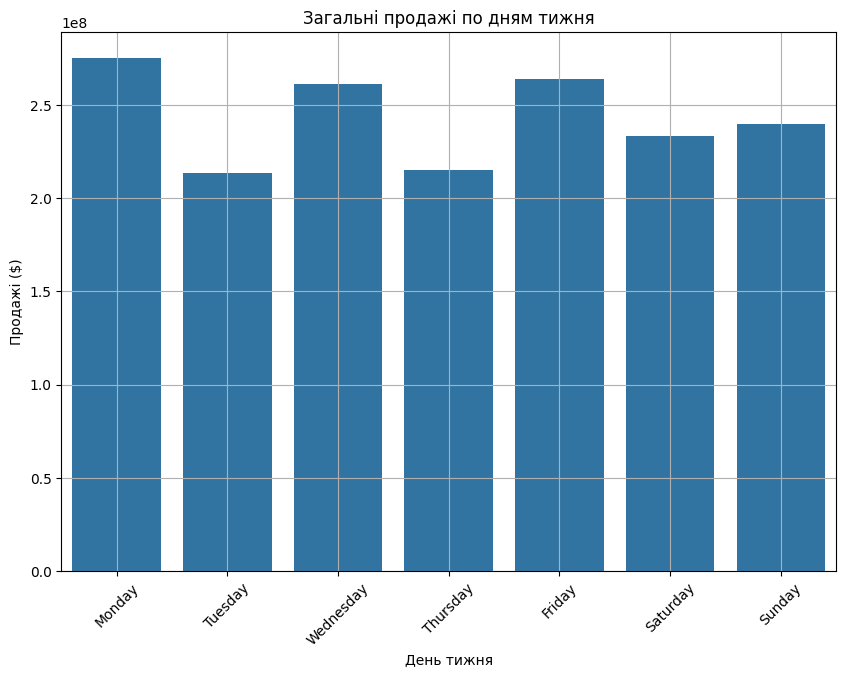

In [ ]:
# Додаємо колонку з днем тижня
merged_data['day_of_week'] = merged_data['order_date'].dt.day_name()  # day_name() повертає день тижня

# Групуємо дані за днями тижня
day_sales = merged_data.groupby('day_of_week')['total_revenue'].sum().reset_index()

# Сортуємо дні тижня по порядку (п'ятниця - неділя)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales['day_of_week'] = pd.Categorical(day_sales['day_of_week'], categories=ordered_days, ordered=True)
day_sales = day_sales.sort_values('day_of_week')

# Візуалізація середніх продажів по дням тижня
plt.figure(figsize=(10, 7))
sns.barplot(data=day_sales, x='day_of_week', y='total_revenue')
plt.title("Загальні продажі по дням тижня")
plt.xlabel("День тижня")
plt.ylabel("Продажі ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- Більші продажі спостерігаються у непарні робочі дні Monday Wednesday Friday.

In [ ]:
# Adding a column for the day of the week
merged_data['day_of_week'] = merged_data['order_date'].dt.day_name()  # day_name() returns the day of the week

# Grouping data by day of the week
day_sales = merged_data.groupby('day_of_week')['total_revenue'].sum().reset_index()

# Sorting the days of the week in order (Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales['day_of_week'] = pd.Categorical(day_sales['day_of_week'], categories=ordered_days, ordered=True)
day_sales = day_sales.sort_values('day_of_week')

# Visualizing total sales by day of the week
plt.figure(figsize=(10, 7))
sns.barplot(data=day_sales, x='day_of_week', y='total_revenue')
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Higher sales are observed on odd weekdays: Monday, Wednesday, and Friday.

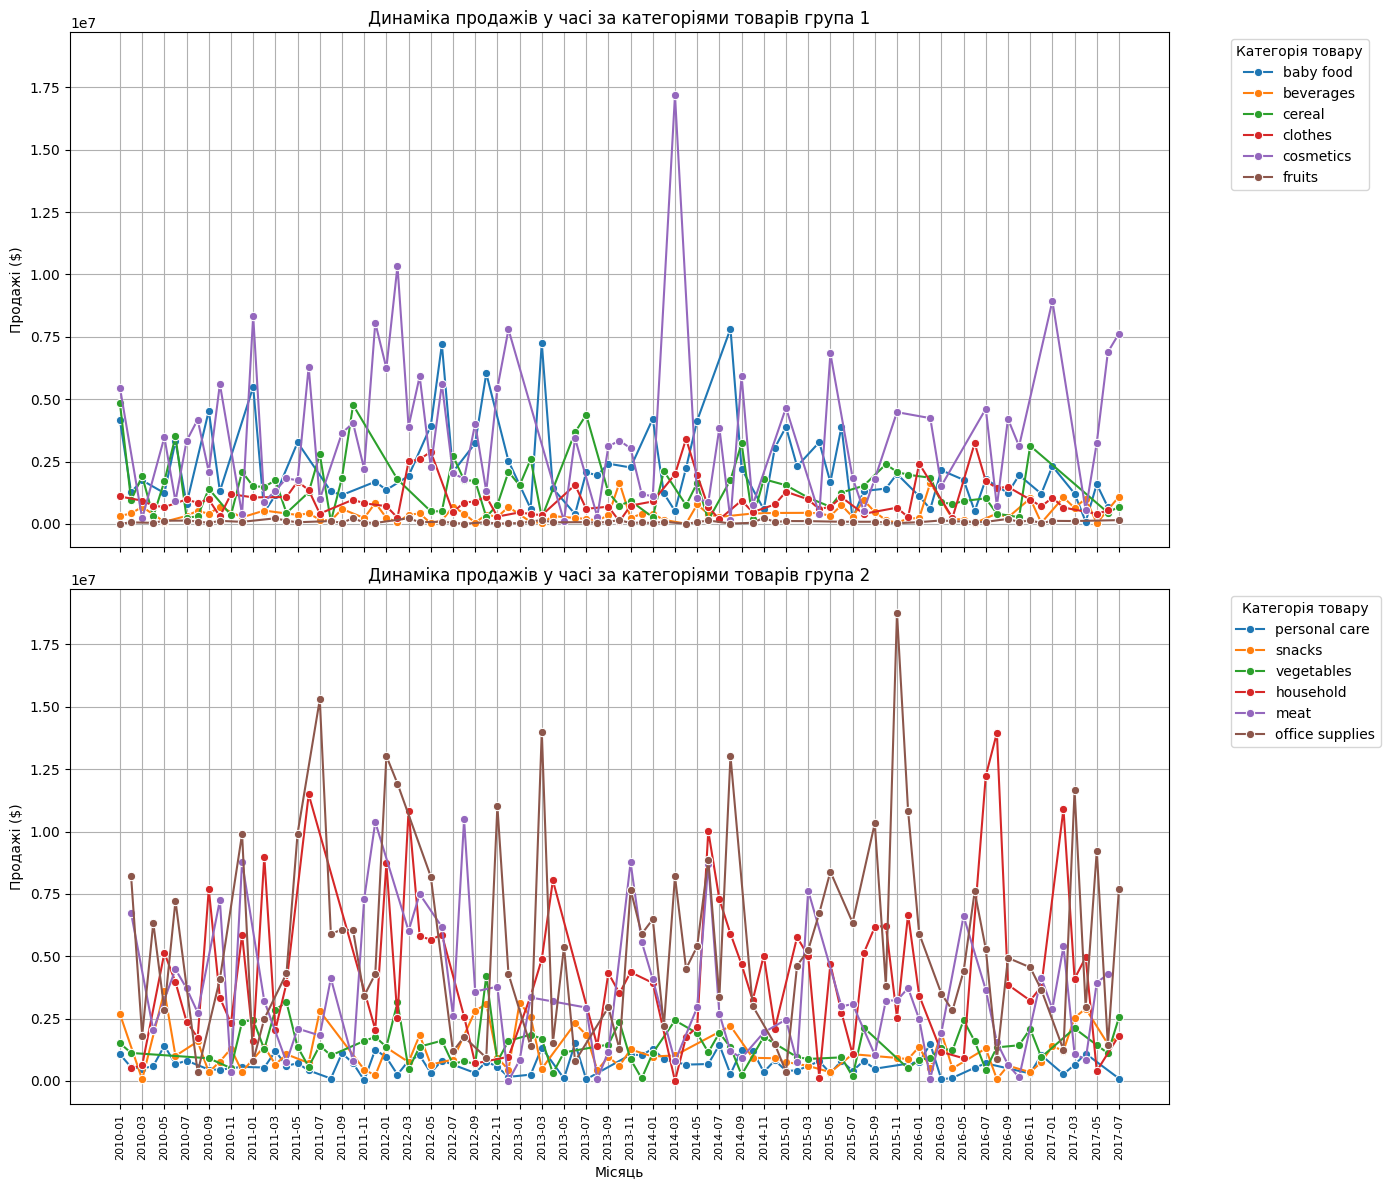

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Отримуємо список унікальних категорій товарів
categories = sorted(category_sales["product_type"].unique())  # Впорядковуємо категорії
first_half = categories[:6]  # Категорії 1-6
second_half = categories[6:12]  # Категорії 7-12

# Фільтруємо дані для кожної групи категорій
category_sales_first = category_sales[category_sales["product_type"].isin(first_half)]
category_sales_second = category_sales[category_sales["product_type"].isin(second_half)]

# Створюємо графіки
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True, sharey=True)

# Функція для візуалізації
def plot_category_sales(ax, data, title):
    sns.lineplot(ax=ax, data=data, x='year_month', y='total_revenue', hue='product_type', marker='o')
    ax.set_title(title)
    ax.set_ylabel("Продажі ($)")
    ax.grid(True)
    ax.legend(title="Категорія товару", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Форматування осі X
    ax.set_xticks(range(0, len(category_sales['year_month'].unique()), 2))
    ax.set_xticklabels(category_sales['year_month'].unique()[::2], rotation=90, fontsize=8)

# Побудова першого графіка (категорії 1-6)
plot_category_sales(axes[0], category_sales_first, "Динаміка продажів у часі за категоріями товарів група 1")

# Побудова другого графіка (категорії 7-12)
plot_category_sales(axes[1], category_sales_second, "Динаміка продажів у часі за категоріями товарів група 2")

# Підпис осі X тільки для нижнього графіка
axes[1].set_xlabel("Місяць")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of unique product categories
categories = sorted(category_sales["product_type"].unique())  # Sort categories
first_half = categories[:6]  # Categories 1-6
second_half = categories[6:12]  # Categories 7-12

# Filter data for each group of categories
category_sales_first = category_sales[category_sales["product_type"].isin(first_half)]
category_sales_second = category_sales[category_sales["product_type"].isin(second_half)]

# Create plots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True, sharey=True)

# Function for visualization
def plot_category_sales(ax, data, title):
    sns.lineplot(ax=ax, data=data, x='year_month', y='total_revenue', hue='product_type', marker='o')
    ax.set_title(title)
    ax.set_ylabel("Sales ($)")
    ax.grid(True)
    ax.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Formatting X-axis
    ax.set_xticks(range(0, len(category_sales['year_month'].unique()), 2))
    ax.set_xticklabels(category_sales['year_month'].unique()[::2], rotation=90, fontsize=8)

# Plot the first graph (categories 1-6)
plot_category_sales(axes[0], category_sales_first, "Sales Dynamics Over Time for Product Categories Group 1")

# Plot the second graph (categories 7-12)
plot_category_sales(axes[1], category_sales_second, "Sales Dynamics Over Time for Product Categories Group 2")

# Label X-axis only for the bottom plot
axes[1].set_xlabel("Month")

plt.tight_layout()
plt.show()
